In [1]:
# If any of the Packages is missing, download them here
# using Pkg
# Pkg.add("CSV")
# Pkg.add("DataFrames")
# Pkg.add("MultivariateStats")
# Pkg.add("Plots")
# Pkg.add("ScikitLearn")

In [2]:
using CSV, DataFrames, MultivariateStats, Plots
using ScikitLearn: fit!, predict, @sk_import, CrossValidation

In [3]:
@sk_import naive_bayes : GaussianNB
@sk_import preprocessing : LabelEncoder
@sk_import metrics : accuracy_score

PyObject <function accuracy_score at 0x00000000665358B0>

In [4]:
# Preparing the Encoder
enc = LabelEncoder()

PyObject LabelEncoder()

In [5]:
# Function to perform the pca and modeling
function do_pca(data_x_float, data_x_cat, data_y, max_dim, model)
    #Fit the data into the PCA model with the given dimensions
    pca = fit(PCA, data_x_float'; maxoutdim=max_dim, pratio = 1.0)    
    
    # Transform the floating x data with the PCA model
    data_x = MultivariateStats.transform(pca, data_x_float')'
    
    # Combine the transformed floating data with the categorical data
    data_x = [data_x_cat data_x]
    
    # Separate the data into train and test using 70% for train and 30% for test
    train_x, test_x, train_y, test_y = CrossValidation.train_test_split(data_x,data_y,test_size=0.3) 
    
    # Fitting the model
    fit!(model, train_x, train_y)
    
    # Predicting the model
    prediction = predict(model, test_x)
    
    # Returning and printing results
    #println("Model Accuracy using ", max_dim, " features: ", accuracy_score(test_y,prediction))
    return accuracy_score(test_y,prediction)
end

do_pca (generic function with 1 method)

In [6]:
# Load the DataSet
file = CSV.File("01_hdp.csv") |> DataFrame

,tumorsize,co2,pain,wound,mobility,ntumors,nmorphine,remission,lungcapacity
,Float64,Float64,Int64,Int64,Int64,Int64,Int64,Int64,Float64
1,67.9812,1.53433,4,4,2,0,0,0,0.801088
2,64.7025,1.67613,2,3,2,0,0,0,0.326444
3,51.567,1.53345,6,3,2,0,0,0,0.565031
4,86.438,1.4533,3,3,2,0,0,0,0.848411
5,53.4002,1.56635,3,4,2,0,0,0,0.886491
6,51.6573,1.41787,4,5,2,0,0,0,0.701031
7,78.9171,1.70663,3,4,2,0,0,0,0.890854
8,69.8332,1.52873,3,3,3,0,0,0,0.66088
9,62.8526,1.54296,4,4,3,2,0,0,0.908871


In [7]:
# Encoding all categorical columns
file[!,"FamilyHx"] .= enc.fit_transform(file[!,"FamilyHx"])
file[!,"SmokingHx"] .= enc.fit_transform(file[!,"SmokingHx"])
file[!,"Sex"] .= enc.fit_transform(file[!,"Sex"])
file[!,"School"] .= enc.fit_transform(file[!,"School"])

8525-element Array{Int64,1}:
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 ⋮
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0

In [8]:
# Getting the y data
data_y = file[!,15] 

8525-element PooledArrays.PooledArray{String,UInt32,1,Array{UInt32,1}}:
 "II"
 "II"
 "II"
 "I"
 "II"
 "I"
 "II"
 "II"
 "II"
 "II"
 "I"
 "II"
 "II"
 ⋮
 "III"
 "I"
 "II"
 "I"
 "IV"
 "IV"
 "I"
 "IV"
 "I"
 "II"
 "IV"
 "II"

In [9]:
# Separating the x data from the whole dataframe
data_x = file[:,1:end .!= 15]

,tumorsize,co2,pain,wound,mobility,ntumors,nmorphine,remission,lungcapacity
,Float64,Float64,Int64,Int64,Int64,Int64,Int64,Int64,Float64
1,67.9812,1.53433,4,4,2,0,0,0,0.801088
2,64.7025,1.67613,2,3,2,0,0,0,0.326444
3,51.567,1.53345,6,3,2,0,0,0,0.565031
4,86.438,1.4533,3,3,2,0,0,0,0.848411
5,53.4002,1.56635,3,4,2,0,0,0,0.886491
6,51.6573,1.41787,4,5,2,0,0,0,0.701031
7,78.9171,1.70663,3,4,2,0,0,0,0.890854
8,69.8332,1.52873,3,3,3,0,0,0,0.66088
9,62.8526,1.54296,4,4,3,2,0,0,0.908871


In [10]:
# Getting all columns that are of type float on the data
data_x_float = select(data_x, Between(:tumorsize,:co2), Between(:lungcapacity, :Age), Between(:WBC,:CRP), :Medicaid)

,tumorsize,co2,lungcapacity,Age,WBC,RBC,BMI,IL6
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,67.9812,1.53433,0.801088,64.9682,6087.65,4.86842,24.1442,3.69898
2,64.7025,1.67613,0.326444,53.9171,6700.31,4.67905,29.4052,2.62748
3,51.567,1.53345,0.565031,53.3473,6042.81,5.00586,29.4826,13.8962
4,86.438,1.4533,0.848411,41.368,7162.7,5.26506,21.5573,3.00803
5,53.4002,1.56635,0.886491,46.8004,6443.44,4.98426,29.8152,3.8907
6,51.6573,1.41787,0.701031,51.9294,6800.55,5.19971,27.1025,1.41822
7,78.9171,1.70663,0.890854,53.8293,6236.45,4.8699,21.1191,2.29322
8,69.8332,1.52873,0.66088,46.5622,3997.7,4.64792,42.4754,4.57562
9,62.8526,1.54296,0.908871,54.3894,6652.8,4.82706,18.6851,8.0302


In [11]:
# Getting all categorical columns from the data
data_x_cat = data_x[!, Not([:tumorsize,:co2, :lungcapacity, :Age, :WBC,:RBC,:BMI,:IL6,:CRP, :Medicaid])]

,pain,wound,mobility,ntumors,nmorphine,remission,Married,FamilyHx,SmokingHx
,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1,4,4,2,0,0,0,0,0,1
2,2,3,2,0,0,0,0,0,1
3,6,3,2,0,0,0,1,0,2
4,3,3,2,0,0,0,0,0,1
5,3,4,2,0,0,0,0,0,2
6,4,5,2,0,0,0,1,0,2
7,3,4,2,0,0,0,1,0,0
8,3,3,3,0,0,0,0,0,1
9,4,4,3,2,0,0,1,1,1


In [12]:
# Normalizing the columns, dividing all the rows by its maximun value
for i=1:size(data_x_float)[2]
    data_x_float[!,i] = data_x_float[!,i] ./ findmax(data_x_float[!,i])[1]
end

In [13]:
# Converting the dataframes to arrays
data_x_cat = convert(Array, data_x_cat)
data_x_float = convert(Array, data_x_float)
data_y = convert(Array, data_y)

8525-element Array{String,1}:
 "II"
 "II"
 "II"
 "I"
 "II"
 "I"
 "II"
 "II"
 "II"
 "II"
 "I"
 "II"
 "II"
 ⋮
 "III"
 "I"
 "II"
 "I"
 "IV"
 "IV"
 "I"
 "IV"
 "I"
 "II"
 "IV"
 "II"

In [14]:
# Initializing the array that would contain the results
value = zeros(10,3)

10×3 Array{Float64,2}:
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0

In [15]:
# Loading the function so it doesnt affect our results
do_pca(data_x_float,data_x_cat, data_y , 1 ,GaussianNB())

# Testing the model for 1-10 max columns on the PCA model
for i=1:10
    
    # Timing and saving the results
    time =  @elapsed acc = do_pca(data_x_float,data_x_cat, data_y , i ,GaussianNB())
    value[i,:] = [i, time, acc]
    
end

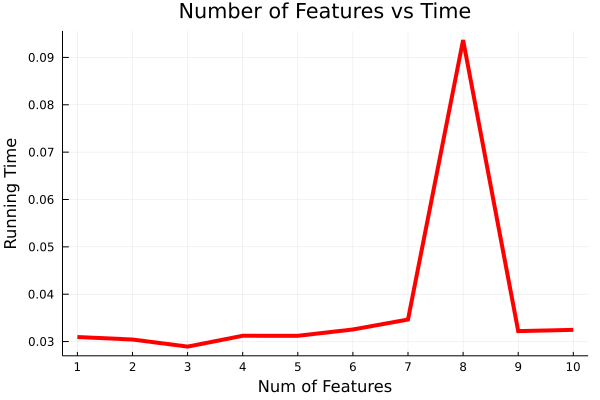

In [16]:
# Plotting the Time as a function of the number of features
feat_time = plot(value[:,1], value[:,2], title= "Number of Features vs Time", legend = false, linecolor= :red, xticks = 0:1:10,   xlabel="Num of Features", ylabel="Running Time", lw=4)

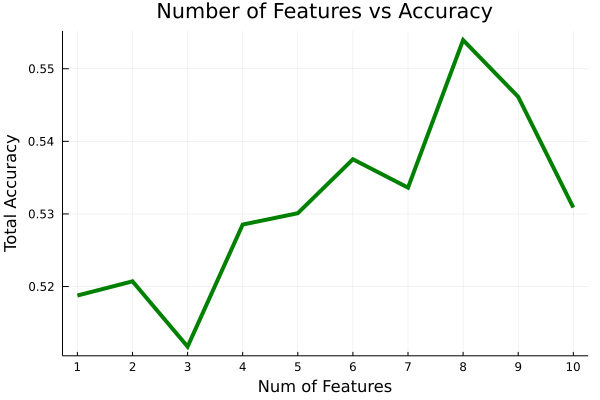

In [17]:
# Plotting the Accuracy as a function of the number of features
acc_time = plot(value[:,1], value[:,3], title= "Number of Features vs Accuracy", legend = false, linecolor= :green, xticks = 0:1:10,  xlabel="Num of Features", ylabel="Total Accuracy", lw=4)